<a href="https://colab.research.google.com/github/susdecoder/QML/blob/main/QSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.1 MB/s eta 0:00:00


Imports

In [ ]:
import numpy as np
import pennylane as qml

from sklearn.datasets import load_iris
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import svm
from sklearn.metrics import classification_report
import time


/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


Data loading:

In [ ]:
X, y = load_iris(return_X_y = True)
X = X[:100,:]
y = y[:100]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5, random_state =1)

[link text](https://)Transforming the data in range [-1,1]

In [ ]:
scaler = MaxAbsScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = np.clip(X_test, 0, 1)

Quantum Computing part


In [ ]:
num_qubits = 4
#because we have 4 independent features / data sets
device = qml.device("default.qubit", wires = num_qubits)

Defining the circuit:

In [ ]:
@qml.qnode(device)
def qkernel_circuit(a,b):
  qml.AngleEmbedding(features=a, wires=range(num_qubits), rotation='X')#generates a quantum value for each value of A
  qml.adjoint(qml.AngleEmbedding(features=b, wires=range(num_qubits), rotation='X'))#applys negative angle in the embedding of b , it makes it easier to compare.
  return qml.probs(wires=range(num_qubits)) #measures the probability of how similar A or B is

Function to compute Quantum Kernel Matrix:

In [ ]:
def qkernel(A, B):
  return np.array([[qkernel_circuit(a,b)[0] for a in A] for b in B])#making a 2D kernel matrix containing similarities between b₁ and a₁, a₂

Combining a quantum kernel with a classical Support Vector Machine (SVM) from scikit-learn.

In [ ]:
start_time = time.time()
qsvm = SVC(kernel=qkernel)
qsvm.fit(X_train, y_train)
y_pred = qsvm.predict(X_test)
qsvm_time = time.time() - start_time
qsvm_accuracy = accuracy_score(y_test, y_pred)
print(f"QSVM Accuracy: {qsvm_accuracy:.2f}, Time: {qsvm_time:.2f}s")


QSVM Accuracy: 0.60, Time: 11.58s


Classical implementation of the same data:

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train SVM
start_time = time.time()
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_predc = svm.predict(X_test)
svm_time = time.time() - start_time
svm_accuracy = accuracy_score(y_test, y_predc)

print(f"SVM Accuracy: {svm_accuracy:.4f}, Time: {svm_time:.2f}s")

SVM Accuracy: 1.0000, Time: 0.00s


from sklearn.metrics import classification_report
qsvm = SVC(kernel=qkernel)
qsvm.fit(X_train, y_train)
y_pred = qsvm.predict(X_test)
print(classification_report(y_test, y_pred))

# Comparison of SVM and QSVM:




In [ ]:
@qml.qnode(device)
def qkernel_circuit(a,b):
  qml.AngleEmbedding(features=a, wires=range(num_qubits), rotation='X')
  qml.adjoint(qml.AngleEmbedding(features=b, wires=range(num_qubits), rotation='X'))
  return qml.probs(wires=range(num_qubits))

In [ ]:
def qkernel(A, B):
  return np.array([[qkernel_circuit(a,b)[0] for a in A] for b in B])

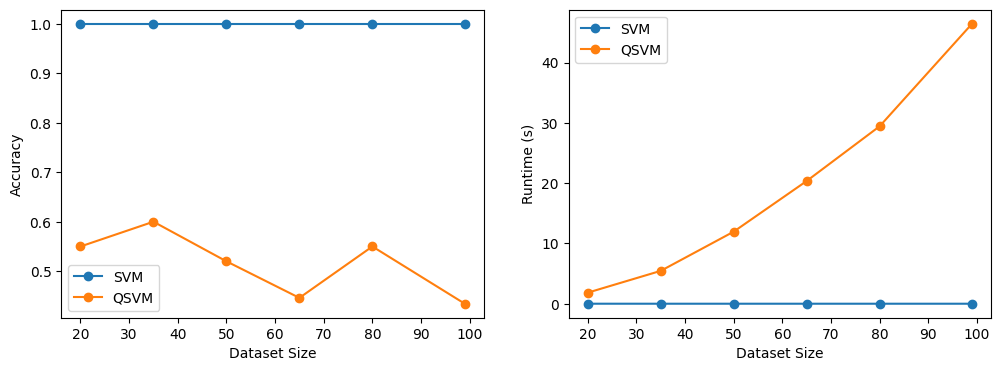

In [ ]:
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC

sizes = [20,35,50,65,80,99]  # Subset sizes
svm_accuracies, qsvm_accuracies = [], []
svm_times, qsvm_times = [], []

for size in sizes:
    X_sub, X_tsub, y_sub, y_tsub = train_test_split(X, y, train_size=size, random_state=42)

    # SVM
    start = time.time()
    svm = SVC(kernel='linear')
    svm.fit(X_sub, y_sub)
    y_sub_predc = svm.predict(X_tsub)
    svm_times.append(time.time() - start)
    svm_accuracies.append(accuracy_score(y_tsub, y_sub_predc))

    # QSVM
    if (len(X_sub)>50):
       X_tsub_scaled = [random.choice(X) for _ in range(len(X_sub))]
       y_tsub = [random.choice(y) for _ in range(len(y_sub))]
    else:
       X_tsub_scaled = [random.choice(X_tsub) for _ in range(len(X_sub))]
       y_tsub = [random.choice(y_tsub) for _ in range(len(y_sub))]
    start = time.time()
    qsvm_sub = SVC(kernel=qkernel)
    qsvm_sub.fit(X_sub, y_sub)
    y_sub_pred = qsvm_sub.predict(X_tsub_scaled)
    qsvm_times.append(time.time() - start)
    qsvm_accuracies.append(accuracy_score(y_tsub, y_sub_pred))



# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sizes, svm_accuracies, 'o-', label='SVM')
plt.plot(sizes, qsvm_accuracies, 'o-', label='QSVM')
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sizes, svm_times, 'o-', label='SVM')
plt.plot(sizes, qsvm_times, 'o-', label='QSVM')
plt.xlabel("Dataset Size")
plt.ylabel("Runtime (s)")
plt.legend()
plt.show()


In [ ]:
print(svm_accuracies)

[1.0, 1.0, 1.0]


In [ ]:
print(qsvm_accuracies)

[0.4]
